In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Сгенерируем выборку из дискретного распределения

In [4]:
X = np.random.choice([1, 2, 5, 6], 50)

In [5]:
X

array([5, 6, 2, 2, 6, 2, 5, 1, 1, 2, 2, 2, 5, 6, 5, 6, 2, 6, 6, 5, 5, 5,
       1, 2, 1, 1, 1, 5, 1, 5, 5, 1, 2, 6, 2, 6, 5, 1, 5, 1, 6, 5, 2, 2,
       5, 1, 5, 2, 5, 1])

Посчитаем вероятности $\bar{p_1}, \bar{p_2}, \bar{p_3}, \bar{p_4}$ по выборке 

$$\bar{p}_k = \frac{1}{n} \sum_{i=0}^n [X_i = a_k], $$


In [26]:
## напишите решение здесь
X = np.random.choice([1, 2, 5, 6], 5000)
a = [1, 2, 5, 6]
n = len(X)
p = np.zeros(len(a))
for i in range(len(a)):
    for j in range(n):
        if a[i] == X[j]:
            p[i] += 1
    p[i] = p[i]/n
    
print(p)

[0.2474 0.2406 0.2582 0.2538]


Сгенерируем выборку из непрерывного распределения 

In [78]:
## выберем гамма-распределение и сгенерируем выборку размера 2000 и выборку размера 100
gamma_val = sts.gamma(a=2, scale=3)
sample1 = gamma_val.rvs(2000)
sample2 = gamma_val.rvs(100)

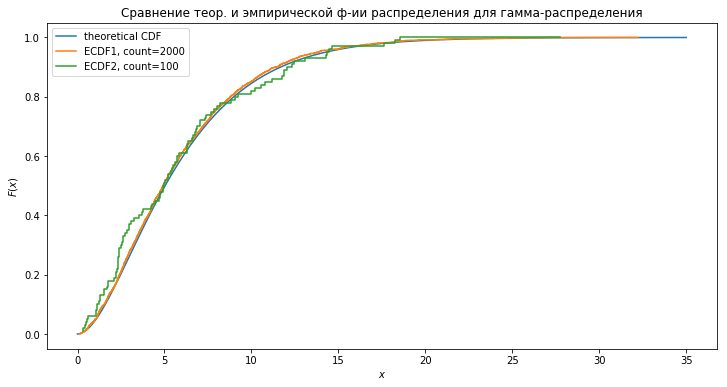

In [79]:
# выберите подходящий масштаб
x = np.linspace(0, 35, 200)
cdf = gamma_val.cdf(x)
plt.figure(figsize=(12,6))
plt.plot(x, cdf, label='theoretical CDF')

from statsmodels.distributions.empirical_distribution import ECDF
ecdf1 = ECDF(sample1)
plt.step(ecdf1.x, ecdf1.y, label='ECDF1, count=2000')

ecdf2 = ECDF(sample2)
plt.step(ecdf2.x, ecdf2.y, label='ECDF2, count=100')

plt.title('Сравнение теор. и эмпирической ф-ии распределения для гамма-распределения')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

Построение гистограммы

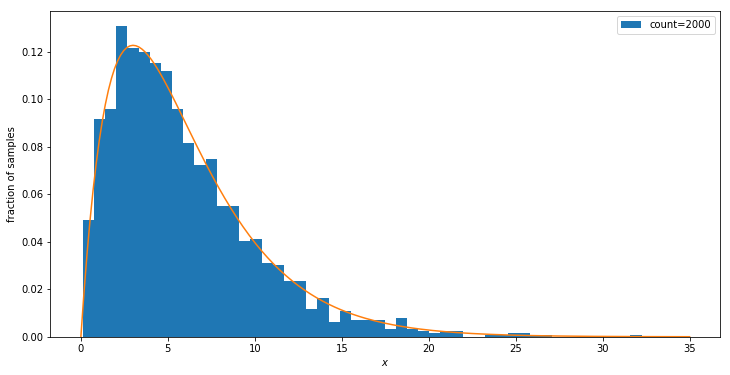

In [92]:
#для первого сэмпла построем гистограмму. Размер выборки 2000
plt.figure(figsize=(12,6))
pdf = gamma_val.pdf(x)
plt.hist(sample1, normed=True, bins=50, label='count=2000')
plt.plot(x, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

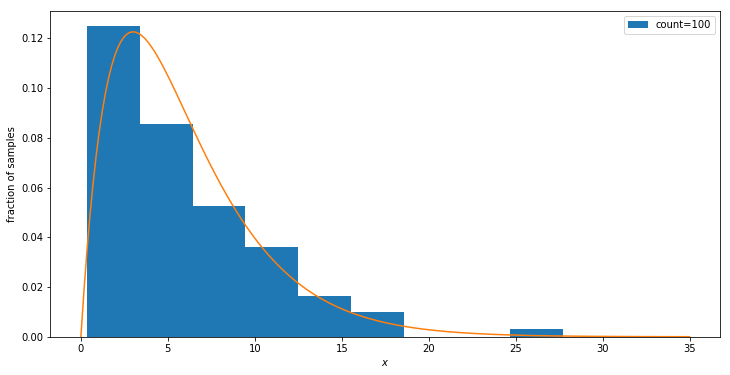

In [99]:
#Постоим гистограмму для второго сэмпла. Размер выборки 100.
plt.figure(figsize=(12,6))
pdf = gamma_val.pdf(x)
plt.hist(sample2, normed=True, bins=9, label='count=100')
plt.plot(x, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

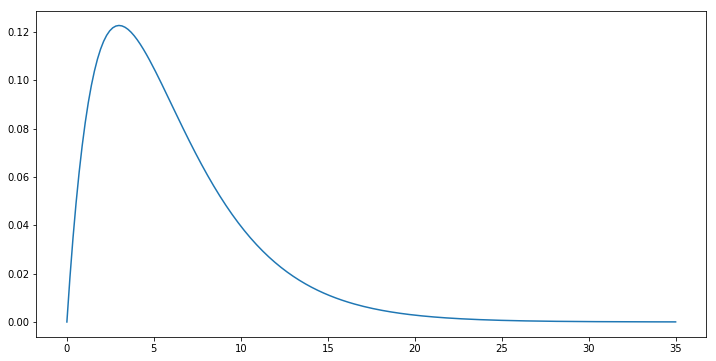

In [101]:
plt.figure(figsize=(12,6))
pdf = gamma_val.pdf(x)
plt.plot(x, pdf)

Определить матож, медиану и моду нормального распределения, равномерного распределения

In [146]:
## решение здесь
n=10000
norm_rv = sts.norm(2, 4)
sample = norm_rv.rvs(n)
mean_x = sum(sample) / n 
median_x = sorted(sample)[n//2]
print("Матож нормального распределения : {:.3f}, медиана: {:.3f}, мода равна матожиданию: {:.3f}".format(mean_x, median_x, mean_x))

n=10000
a = 1
b = 5
uniform = sts.uniform(a, b-a)
sample = uniform.rvs(n)
mean_x = sum(sample) / n 
median_x = sorted(sample)[n//2]
print("Матож равномерного распределения : {:.3f}, медиана: {:.3f}".format(mean_x, median_x))

Матож нормального распределения : 2.020, медиана: 1.981, мода равна матожиданию: 2.020
Матож равномерного распределения : 3.006, медиана: 3.006


Оценим параметры дисперсии нормального, экспоненциального распределения

$$\bar{X} = \frac 1n \sum_i X_i $$

$$m = \begin{cases}
X_{(n / 2)},\ n = 2k \\
\dfrac{X_{(n / 2)} + X_{(n / 2) + 1}}{2},\ n = 2k + 1 \\
\end{cases}$$

$$s^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2 $$

In [160]:
## решение здесь
import math
n=5000
norm_rv = sts.norm(2, 4)
sample = norm_rv.rvs(n)

mean_x = sum(sample) / n 
var_x = 1 / (n - 1) * np.sum([(sample[i] - mean_x)**2 for i in range(n)])
print(f"Дисперсия нормального расп. : {var_x:.3f}")

Дисперсия нормального расп. : 16.110


In [164]:
## Аналогично для эспн. распределения.
import math
n=5000
expon_rv = sts.expon(scale=2) # scale = 1/lambda
sample = expon_rv.rvs(n)

mean_x = sum(sample) / n 
var_x = 1 / (n - 1) * np.sum([(sample[i] - mean_x)**2 for i in range(n)])
print(f"Дисперсия эспн. расп. : {var_x:.3f}")

Дисперсия эспн. расп. : 3.947


## ЦПТ

Text(0.5,0,'$x$')

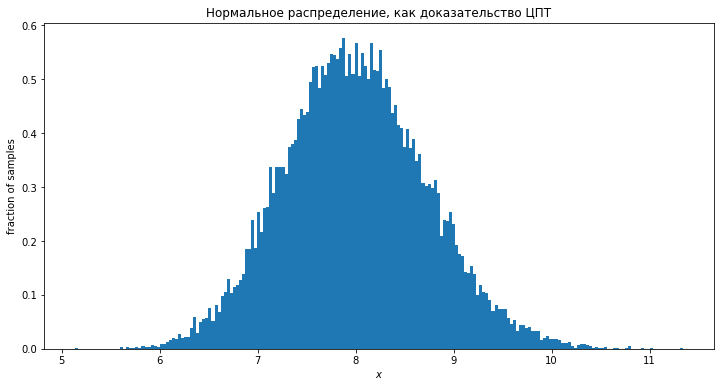

In [189]:
#Гамма-распределение
results = []
n = 30
gamma_rv = sts.gamma(scale=2, a=4)
for i in range(20000):
    x = gamma_rv.rvs(n)
    results.append(x.mean())

plt.figure(figsize=(12,6))
plt.hist(results, normed=True, bins=200)
plt.title('Нормальное распределение, как доказательство ЦПТ')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

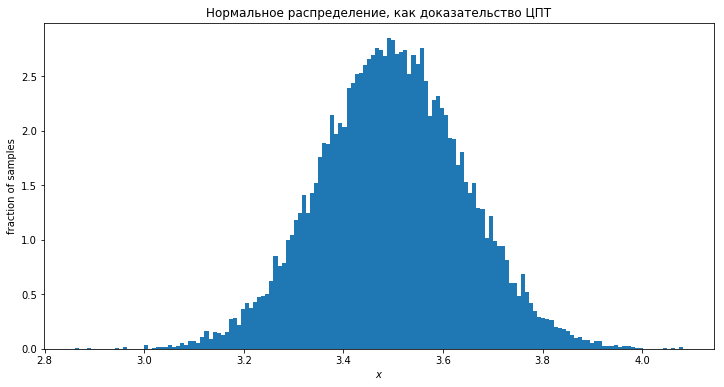

In [192]:
#Равномерное распределение
results = []
n = 100
uniform_rv = sts.uniform(1, 5)
for i in range(20000):
    x = uniform_rv.rvs(n)
    results.append(x.mean())

plt.figure(figsize=(12,6))
plt.hist(results, normed=True, bins=150)
plt.title('Нормальное распределение, как доказательство ЦПТ')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

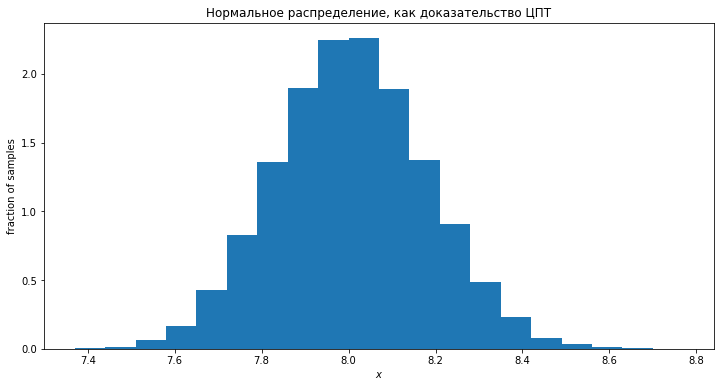

In [196]:
#распределение Пуассона
results = []
n = 100
poisson_rv = sts.poisson(3, 5)
for i in range(20000):
    x = poisson_rv.rvs(n)
    results.append(x.mean())

plt.figure(figsize=(12,6))
plt.hist(results, normed=True, bins=20)
plt.title('Нормальное распределение, как доказательство ЦПТ')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')